In [2]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env

# For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

## a. Has the network latency gone up since we switched internet service providers?

- **Null Hypothesis:** Our latency has not gone up, or it is lower, since switching service providers. 
- **Alternative Hypothesis**: Our latency has gone up since switching.
<br> </br>
- **True Positive:** We can demonstrate reliably that our average latency has increased by measuring ping during certain tasks. 
- **True Negative:** We can demonstrate reliably that our average latency has decreased by showing our ping has gone down compared to before during similar tasks. 
- **Type 1:** We assume our latency has gotten better because we perform better in games, but really either nothing has changed or it has gotten worse, we just got good. 
- **Type 2:** We assume our latency has gotten worse because we're doing worse in games, but really it got faster, we just need to get good.

## b. Is the website redesign any good?

- **Null Hypothesis:** Our website redesign was not any better, or is demonstrably worse, compared to before. 
- **Alternative Hypothesis:** Our website redesign is good, and makes the website better. 
<br> </br>
- **True Positive:** We run a survey on customer sentiment and find that overall experiential satisfaction is higher after the redesign. 
- **True Negative:** We run a survey on customer sentiment and find that overall experiential satisfaction is lower, or the same, after the redesign. 
- **False Positive:** We ask our grandma what she thinks of our hard work, and she tells us that it's much lovelier than before, so we just go with that, but most customers actually dislike it.
- **False Negative:** Our cousin, who is mad that grandma likes us more, finds the survey and spams it with a bunch of fake entries saying that the redesign is terrible, but most customers like it more. 

## c. Is our television ad driving more sales?

- **Null Hypothesis:** Our television ad is not driving more sales, or is in fact harming our sales. 
- **Alternative Hypothesis:** Our television ad has directly impacted sales in a positive way. 
<br> </br>
- **True Positive:** Customers report that seeing our advertisement encouraged them to go buy our product.
- **True Negatie:** Sales drop or remain neutral, and we are able to link that drop to sentiment about our ad, which offended many people, or simply was not effective. 
- **False Positive:** Grandma saw the ad and wanted us to feel great about all our hard work, so she went online and bought 12 of everything.
- **False Negative:** We run the ad and get more sales in that area, but sales may drop off in another section of the business and we don't account for that, so we don't notice the ad's impact. 

# T-Test Exercises:

## 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

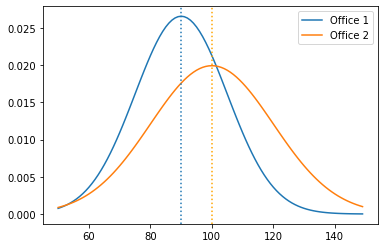

In [79]:
#Visualizing Distribution:

x = np.arange(50, 150)
y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.plot(x, y1, label = 'Office 1')
plt.plot(x, y2, label = 'Office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')
plt.legend()

In [81]:
#Adam's solution:

t, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var=False)

#I need to go through and figure out the ind_from_stats version of this.

In [83]:
t, p 

(-2.7091418459143854, 0.00811206270346016)

In [84]:
p < α

#Because p is less than alpha, then we reject the null and know that the difference in performance is not due to chance. 

True

In [85]:
alpha = .05
office_1 = 40
office_2 = 100

t, p = stats.ttest_ind(90, 100, equal_var=False)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [86]:
t, p

(nan, nan)

## 2. Load the mpg dataset and use it to answer the following questions:

In [87]:
from pydataset import data 
mpg = data('mpg')

In [88]:
mpg = pd.DataFrame(mpg)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [93]:
α = .05

mpg_2008 = ((mpg[mpg.year == 2008].cty * .45) + (mpg[mpg.year == 2008].hwy) * .55) / 2
mpg_1999 = ((mpg[mpg.year == 1999].cty * .45) + (mpg[mpg.year == 1999].hwy) * .55) / 2

t,p = stats.ttest_ind(mpg_2008, mpg_1999, equal_var = False)

In [94]:
t, p

(-0.19050262212603053, 0.8490824124255725)

In [95]:
p < α

#Since the p is not less than alpha, we cannot reject the null and claim that there is a difference in fuel-efficiency from 2008 vs. 1999.

False

### b. Are compact cars more fuel-efficient than the average car?

In [36]:
mpg['class']

1      compact
2      compact
3      compact
4      compact
5      compact
        ...   
230    midsize
231    midsize
232    midsize
233    midsize
234    midsize
Name: class, Length: 234, dtype: object

In [97]:
compact = (((mpg[mpg['class'] == 'compact'].cty) * .45) + ((mpg[mpg['class'] == 'compact'].hwy) * .55) / 2)
μth = (((mpg.cty * .45) + (mpg.hwy * .55)) / 2).mean()

In [98]:
t, p = stats.ttest_1samp(compact, μth)

t, p

(17.922690654242725, 2.2183161603173763e-22)

### I need to go through and look into why we divide the p value by 2

In [100]:
p / 2 < α

#Because p / 2 < alpha, we can reject the null and claim that compact cars are more fuel-efficient than the average car. 

True

### c. Do manual cars get better gas mileage than automatic cars?

In [78]:
mpg_manl = (mpg[mpg.trans.startswith('a')].cty + mpg[mpg.trans.startswith('a')]) / 2
mpg_auto = (mpg[mpg.trans == 'a*'].cty + mpg[mpg.trans == 'a*'].hwy) / 2

t, p = stats.ttest_1samp(mpg_manl, mpg_auto)

AttributeError: 'Series' object has no attribute 'startswith'

In [74]:
mpg[mpg.trans == 'm*'].cty

Series([], Name: cty, dtype: int64)

In [70]:
t, p

(Series([], dtype: float64), array([], dtype=float64))

In [ ]:
#Adam's solution:

In [102]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

fe_manual

AttributeError: 'DataFrame' object has no attribute 'avg_fe'

In [ ]:
fe_auto.hist()

In [ ]:
fe_manual.hist()

In [ ]:
fe_auto.var(), fe_manual.var()

In [ ]:
#levene test:
stats.levene(fe_auto, fe_manual)

#This apparently shows that the variances are equal? Since the p-value for this test is higher than .05, we can reject the null for this test which says "these variances are not the same", so we'd say these variances ARE the same. 

In [103]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var = True)
t, p/2

NameError: name 'fe_manual' is not defined

In [ ]:
#Because the p-value is lower than .05, we can reject the null and make the claim that manual transmissions do get better gas mileage on average than automatic transmissions. 